In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
data = pd.read_csv('Birds_Train_Dataset.csv', low_memory=False)

In [5]:
print(data.head())

   BIRD INDEX   BIRD_NAME           SCIENTIFIC NAME  OBSERVATION COUNT  \
0           0  Bald Eagle  Haliaeetus leucocephalus                  1   
1           1  Bald Eagle  Haliaeetus leucocephalus                 57   
2           2  Bald Eagle  Haliaeetus leucocephalus                 70   
3           3  Bald Eagle  Haliaeetus leucocephalus                  1   
4           4  Bald Eagle  Haliaeetus leucocephalus                  1   

         COUNTRY     STATE COUNTY                    LOCALITY   LATITUDE  \
0  United States  Illinois  Adams                  Mark Twain  40.005002   
1  United States  Illinois  Adams                      Quincy  39.935650   
2  United States  Illinois  Adams                      Quincy  39.935650   
3  United States  Illinois  Adams                      Quincy  39.935650   
4  United States  Illinois  Adams  Lock and Dam 21 (Illinois)  39.904217   

   LONGITUDE OBSERVATION DATE TIME OBSERVATIONS STARTED PROTOCOL TYPE  \
0 -91.448822       03-12-

In [6]:
data.tail()

,BIRD INDEX,BIRD_NAME,SCIENTIFIC NAME,OBSERVATION COUNT,COUNTRY,STATE,COUNTY,LOCALITY,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,PROTOCOL TYPE,PROTOCOL CODE,REVIEWED,OBSERVATION YEAR,OBSERVATION MONTH,OBSERVATION DAY,STATUS
732848,732908,Worm-eating Warbler,Helmitheros vermivorum,1,United States,Illinois,Woodford,Black Partridge Park,40.801726,-89.391160,22-05-2014,7:30:00,Traveling,P22,0,2014,5,22,Endangered
732849,732909,Worm-eating Warbler,Helmitheros vermivorum,1,United States,Illinois,Woodford,Black Partridge Park,40.801726,-89.391160,21-05-2014,8:15:00,Traveling,P22,0,2014,5,21,Endangered
732850,732910,Worm-eating Warbler,Helmitheros vermivorum,1,United States,Illinois,Woodford,Black Partridge Park,40.801726,-89.391160,26-05-2014,6:30:00,Traveling,P22,0,2014,5,26,Endangered
732851,732911,Worm-eating Warbler,Helmitheros vermivorum,1,United States,Illinois,Woodford,Stine's Timber (Woodford Co.),40.766615,-89.067493,01-05-2018,13:10:00,Traveling,P22,0,2018,5,1,Endangered
732852,732912,Worm-eating Warbler,Helmitheros vermivorum,1,United States,Illinois,Woodford,Black Partridge Park,40.801726,-89.391160,10-05-2020,6:44:00,Traveling,P22,0,2020,5,10,Endangered


In [7]:
data.shape

(732853, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732853 entries, 0 to 732852
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BIRD INDEX                 732853 non-null  int64  
 1   BIRD_NAME                  732853 non-null  object 
 2   SCIENTIFIC NAME            732853 non-null  object 
 3   OBSERVATION COUNT          732853 non-null  int64  
 4   COUNTRY                    732853 non-null  object 
 5   STATE                      732853 non-null  object 
 6   COUNTY                     732853 non-null  object 
 7   LOCALITY                   732850 non-null  object 
 8   LATITUDE                   732853 non-null  float64
 9   LONGITUDE                  732853 non-null  float64
 10  OBSERVATION DATE           732853 non-null  object 
 11  TIME OBSERVATIONS STARTED  693202 non-null  object 
 12  PROTOCOL TYPE              732853 non-null  object 
 13  PROTOCOL CODE              73

In [9]:
data.isnull().sum()

BIRD INDEX                       0
BIRD_NAME                        0
SCIENTIFIC NAME                  0
OBSERVATION COUNT                0
COUNTRY                          0
STATE                            0
COUNTY                           0
LOCALITY                         3
LATITUDE                         0
LONGITUDE                        0
OBSERVATION DATE                 0
TIME OBSERVATIONS STARTED    39651
PROTOCOL TYPE                    0
PROTOCOL CODE                    0
REVIEWED                         0
OBSERVATION YEAR                 0
OBSERVATION MONTH                0
OBSERVATION DAY                  0
STATUS                       92011
dtype: int64

In [10]:
data.describe()

,BIRD INDEX,OBSERVATION COUNT,LATITUDE,LONGITUDE,REVIEWED,OBSERVATION YEAR,OBSERVATION MONTH,OBSERVATION DAY
count,732853.000000,732853.000000,732853.000000,732853.000000,732853.000000,732853.000000,732853.000000,732853.000000
mean,366454.186642,7.540130,41.060796,-88.520339,0.016557,2016.479234,6.189353,15.348812
std,211570.117232,66.949096,1.402217,0.866891,0.127605,7.722327,2.684729,8.690390
min,0.000000,1.000000,36.983594,-91.508155,0.000000,1898.000000,1.000000,1.000000
25%,183233.000000,1.000000,40.365512,-89.146780,0.000000,2015.000000,5.000000,8.000000
50%,366461.000000,1.000000,41.725898,-88.193586,0.000000,2019.000000,6.000000,15.000000
75%,549674.000000,3.000000,41.963383,-87.843247,0.000000,2021.000000,8.000000,23.000000
max,732912.000000,20000.000000,42.505734,-87.460868,1.000000,2023.000000,12.000000,31.000000


In [11]:
data['BIRD_NAME'].value_counts()

BIRD_NAME
Double-crested Cormorant     196514
Indigo Bunting               188939
Bald Eagle                   111174
Red-headed Woodpecker         92011
Scarlet Tanager               44727
Northern Harrier              41086
Great Horned Owl              32099
Dunlin                        11432
Black-bellied Plover           6375
Snowy Owl                      5153
Worm-eating Warbler            3313
Black-crowned Night-Heron        30
Name: count, dtype: int64

In [12]:
X = data.drop(columns=['BIRD_NAME', 'REVIEWED','PROTOCOL TYPE','SCIENTIFIC NAME','COUNTRY','STATE','COUNTY','LOCALITY','OBSERVATION DATE','TIME OBSERVATIONS STARTED','PROTOCOL CODE','STATUS'], axis=1)
Y = data['BIRD_NAME']

In [13]:
print(X)

        BIRD INDEX  OBSERVATION COUNT   LATITUDE  LONGITUDE  OBSERVATION YEAR  \
0                0                  1  40.005002 -91.448822              2008   
1                1                 57  39.935650 -91.409850              2010   
2                2                 70  39.935650 -91.409850              2010   
3                3                  1  39.935650 -91.409850              2010   
4                4                  1  39.904217 -91.427192              2010   
...            ...                ...        ...        ...               ...   
732848      732908                  1  40.801726 -89.391160              2014   
732849      732909                  1  40.801726 -89.391160              2014   
732850      732910                  1  40.801726 -89.391160              2014   
732851      732911                  1  40.766615 -89.067493              2018   
732852      732912                  1  40.801726 -89.391160              2020   

        OBSERVATION MONTH  

In [14]:
print(Y)

0                  Bald Eagle
1                  Bald Eagle
2                  Bald Eagle
3                  Bald Eagle
4                  Bald Eagle
                 ...         
732848    Worm-eating Warbler
732849    Worm-eating Warbler
732850    Worm-eating Warbler
732851    Worm-eating Warbler
732852    Worm-eating Warbler
Name: BIRD_NAME, Length: 732853, dtype: object


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(732853, 7) (586282, 7) (146571, 7)


In [17]:
#RBF
model = svm.SVC(kernel='rbf')

In [18]:
model.fit(X_train, Y_train)

SVC()

In [19]:
Y_pred = model.predict(X_test)


In [20]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)  # Set zero_division parameter
recall = recall_score(Y_test, Y_pred, average='weighted', zero_division=0)  # Set zero_division parameter

# Print the metrics in a table format
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall]
})

In [21]:
print(results)

      Metric    Score
0   Accuracy  0.99504
1  Precision  0.99221
2     Recall  0.99504


In [23]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Set zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Set zero_division parameter

# Print the model score (accuracy), precision, and recall
print("Model Score (Accuracy):", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Model Score (Accuracy): 0.99998635473593
Precision: 0.9999863559679296
Recall: 0.99998635473593


In [24]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tabulate import tabulate

# Load the data with specified dtype to handle mixed types
data = pd.read_csv('Birds_Train_Dataset.csv', dtype=str)

# Assuming the dataset has a column 'longitude' for classification
# and the rest of the columns are features
X = data.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
Y = data['BIRD_NAME']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Encode the label column if it's not numeric
if Y.dtype == 'object':
    le = LabelEncoder()
    Y = le.fit_transform(Y)

# Ensure there are no NaN values in Y
Y = pd.Series(Y).fillna(0).astype(int)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with reduced complexity
decision_tree_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limiting the maximum depth
    min_samples_split=5,  # Increasing the min samples required to split
    min_samples_leaf=2  # Increasing the min samples required at a leaf node
)

# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Calculate the evaluation metrics for training and testing datasets
train_accuracy = accuracy_score(y_train, decision_tree_classifier.predict(X_train))
train_precision = precision_score(y_train, decision_tree_classifier.predict(X_train), average='weighted')
train_recall = recall_score(y_train, decision_tree_classifier.predict(X_train), average='weighted')

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')

# Display the evaluation metrics in a table using tabulate
evaluation_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall]
})

print(tabulate(evaluation_table, headers='keys', tablefmt='pretty'))


C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


+---+----------+--------------------+--------------------+--------------------+
|   | Dataset  |      Accuracy      |     Precision      |       Recall       |
+---+----------+--------------------+--------------------+--------------------+
| 0 | Training | 0.9244953793566918 | 0.9224311364387114 | 0.9244953793566918 |
| 1 | Testing  | 0.9252785339528283 | 0.9232383618759786 | 0.9252785339528283 |
+---+----------+--------------------+--------------------+--------------------+


Test Accuracy: 99.99%
Precision: 1.00
Recall: 1.00


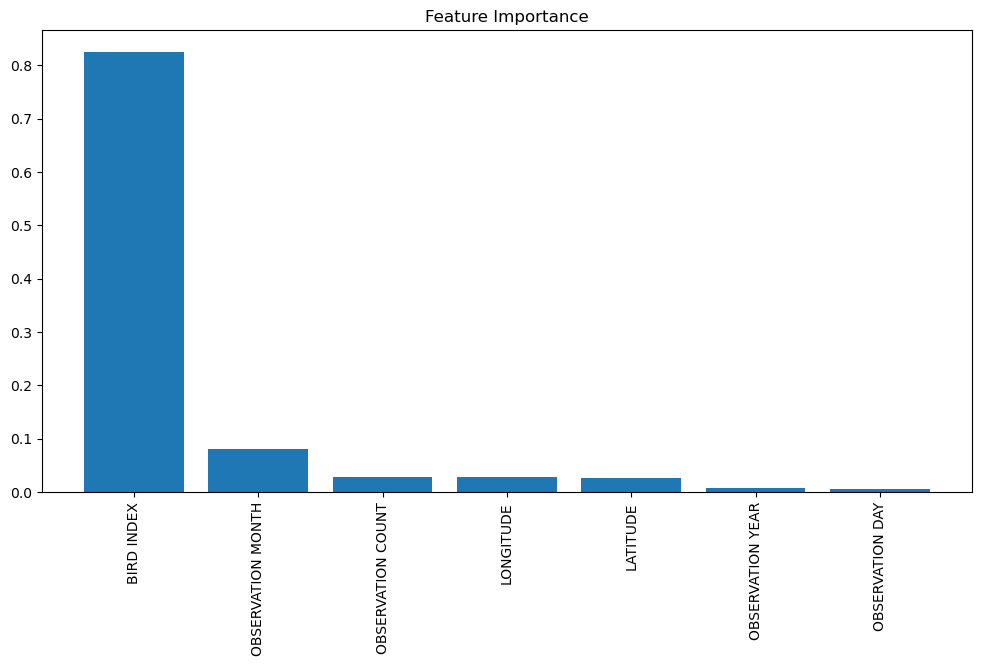

In [25]:
#Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Birds_Train_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column
label_encoder = LabelEncoder()
df['BIRD_NAME'] = label_encoder.fit_transform(df['BIRD_NAME'])

# Define features and target
X = df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
Y = df['BIRD_NAME']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with adjusted parameters for randomness
rf = RandomForestClassifier(random_state=42, max_features=0.3, min_samples_split=15)  # Adjusted parameters for randomness

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


C:\Users\sahan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6226 - loss: 1.2617 - val_accuracy: 0.8970 - val_loss: 0.2386
Epoch 2/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9128 - loss: 0.2577 - val_accuracy: 0.9684 - val_loss: 0.0931
Epoch 3/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9454 - loss: 0.1587 - val_accuracy: 0.9765 - val_loss: 0.0649
Epoch 4/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9594 - loss: 0.1178 - val_accuracy: 0.9846 - val_loss: 0.0430
Epoch 5/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9668 - loss: 0.0968 - val_accuracy: 0.9858 - val_loss: 0.0372
Epoch 6/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9713 - loss: 0.0839 - val_accuracy: 0.9875 - val_loss: 0.0344
Epoch 7/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9742 - loss: 0.0752 - val_accuracy: 0.9867 - val_loss: 0.0307
Epoch 8/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9758 - loss: 0.0700 - val_acc

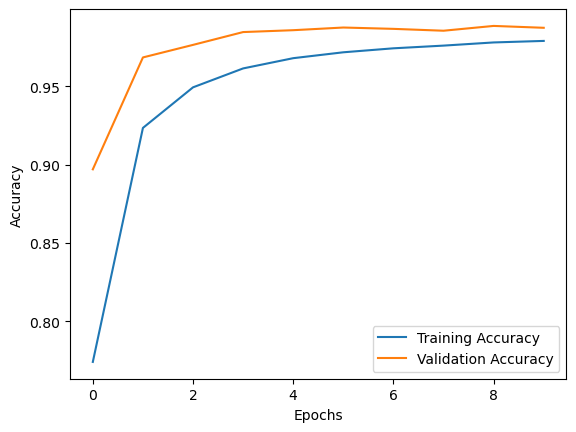

In [26]:
#CNN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Birds_Train_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column
label_encoder = LabelEncoder()
df['BIRD_NAME'] = label_encoder.fit_transform(df['BIRD_NAME'])

# Define features and target
X = df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
Y = df['BIRD_NAME']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable (bird_name) if it's categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Reshape data for CNN input (samples, width, height, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model without Conv2D and MaxPooling2D
model = Sequential([
    Flatten(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),  # Flatten the input
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=1000, validation_split=0.01)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
#creating the HDF5 for CNN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Load the dataset
df = pd.read_csv('Birds_Train_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column
label_encoder = LabelEncoder()
df['BIRD_NAME'] = label_encoder.fit_transform(df['BIRD_NAME'])

# Define features and target
X = df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
Y = df['BIRD_NAME']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable (bird_name) if it's categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Reshape data for CNN input (samples, width, height, channels)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model without Conv2D and MaxPooling2D
model = Sequential([
    Flatten(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),  # Flatten the input
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=1000, validation_split=0.01)

# Save the trained model to an HDF5 file
model.save('C:/Users/sahan/Downloads/nausheen/bird_classification_model.h5')


C:\Users\sahan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6290 - loss: 1.2402 - val_accuracy: 0.9277 - val_loss: 0.2350
Epoch 2/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9066 - loss: 0.2746 - val_accuracy: 0.9703 - val_loss: 0.0935
Epoch 3/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9440 - loss: 0.1630 - val_accuracy: 0.9792 - val_loss: 0.0619
Epoch 4/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9569 - loss: 0.1244 - val_accuracy: 0.9848 - val_loss: 0.0478
Epoch 5/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9636 - loss: 0.1049 - val_accuracy: 0.9838 - val_loss: 0.0442
Epoch 6/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9689 - loss: 0.0899 - val_accuracy: 0.9862 - val_loss: 0.0381
Epoch 7/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9727 - loss: 0.0803 - val_accuracy: 0.9864 - val_loss: 0.0356
Epoch 8/10
581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9755 - loss: 0.0713 - val_a

In [28]:
#creating the joblib for KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Birds_Train_Dataset.csv', low_memory=False)

# Encode the 'BIRD_NAME' column
label_encoder = LabelEncoder()
df['BIRD_NAME'] = label_encoder.fit_transform(df['BIRD_NAME'])

# Define features and target
X = df.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
Y = df['BIRD_NAME']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert all columns to numeric, if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaN values resulting from coercion
X.fillna(0, inplace=True)  # or you can use X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Train the KNN model
k = 5  # number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Save the trained KNN model to a file
import joblib
joblib.dump(knn_model, 'knn_model.joblib')


['knn_model.joblib']